In [1]:
import os
import getpass
if getpass.getuser() == 'vscode':       # Running in container
    os.chdir('/workspaces/kornia/')
else:                                   # Running in virtual environment
    os.chdir(os.path.join(os.path.expanduser('~'), 'Documents/Git/kornia/'))
print(os.getcwd())

/home/yhollander/Documents/Git/kornia


## Parsing camera poses

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from kornia.geometry.nerf.camera_utils import CameraParser
from kornia.geometry.nerf.rays import UniformRaySampler

from kornia.geometry.nerf.kornia_nerf_jupyter.extrinsic2pyramid.util.camera_pose_visualizer import CameraPoseVisualizer

In [3]:
camera_parser = CameraParser('./test/geometry/nerf/cameras.xml', device='cpu')
cameras = camera_parser.create_cameras()

initialize camera pose visualizer


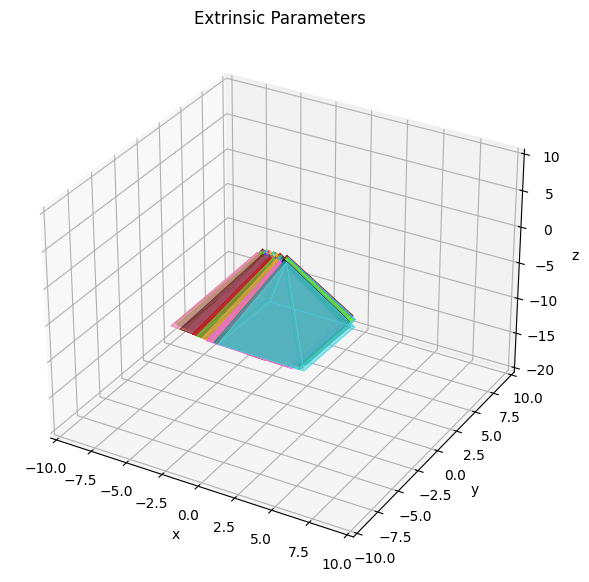

In [4]:
visualizer = CameraPoseVisualizer([-10, 10], [-10, 10], [-20, 10])
for i in range(cameras.batch_size):
    R = cameras.extrinsics[i].numpy()
    c = np.random.rand(3)
    visualizer.extrinsic2pyramid(R, c, 10)
visualizer.show()

(-0.862722073495388,
 0.25253594368696214,
 -0.02818036619573832,
 0.6882502751424908)

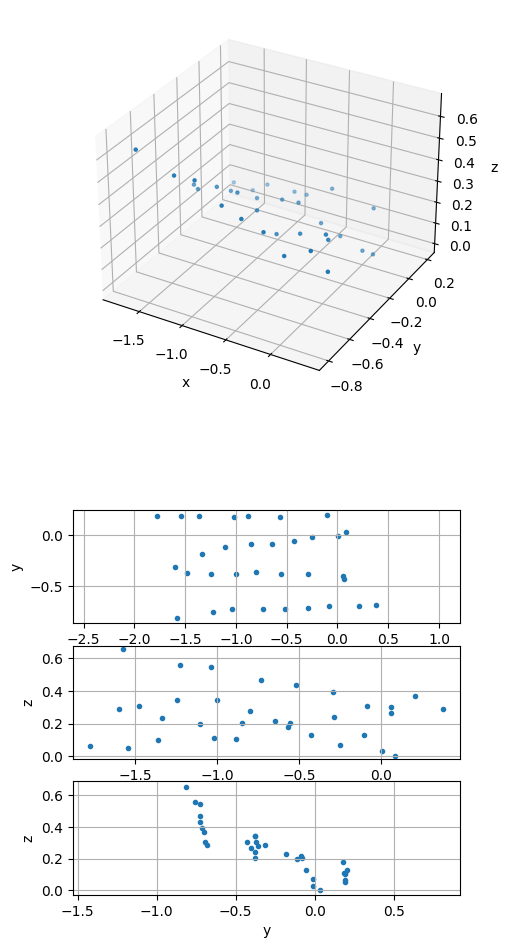

In [7]:
# cameras.translation_vector

fig = plt.figure(figsize=(5, 10))
subfigs = fig.subfigures(2, 1, hspace=0.07)

ax1 = subfigs[0].add_subplot(projection='3d')

ax = subfigs[1].subplots(3, 1)
ax2 = ax[0]
ax3 = ax[1]
ax4 = ax[2]

t = cameras.translation_vector
ax1.scatter(t[:, 0], t[:, 1], t[:, 2], marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax2.scatter(t[:, 0], t[:, 1], marker='.')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid('on')
ax2.axis('equal')

ax3.scatter(t[:, 0], t[:, 2], marker='.')
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.grid('on')
ax3.axis('equal')

ax4.scatter(t[:, 1], t[:, 2], marker='.')
ax4.set_xlabel('y')
ax4.set_ylabel('z')
ax4.grid('on')
ax4.axis('equal')

## Spiral pattern based on parsed cameras

In [ ]:
from kornia.geometry.nerf.camera_utils import create_spiral_path

cameras_spiral = create_spiral_path(cameras, rad=1., num_views=20, num_circles=2)

initialize camera pose visualizer


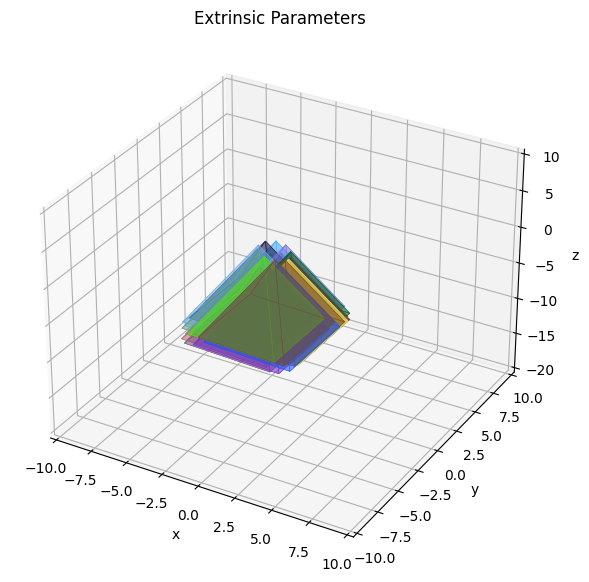

In [ ]:
visualizer = CameraPoseVisualizer([-10, 10], [-10, 10], [-20, 10])
for i in range(cameras_spiral.batch_size):
    R = cameras_spiral.extrinsics[i].numpy()
    c = np.random.rand(3)
    visualizer.extrinsic2pyramid(R, c, 10)
visualizer.show()

In [ ]:
uniform_sampler_cameras = UniformRaySampler(2, 20)
points_2d_cameras = uniform_sampler_cameras.sample_points_2d(cameras.height, cameras.width, sampling_step=80)[762048]
print(points_2d_cameras)
points_3d_cameras = cameras.unproject(points_2d_cameras.points_2d, 1)

TypeError: __init__() missing 1 required positional argument: 'ndc'

Text(0.5, 0, 'z')

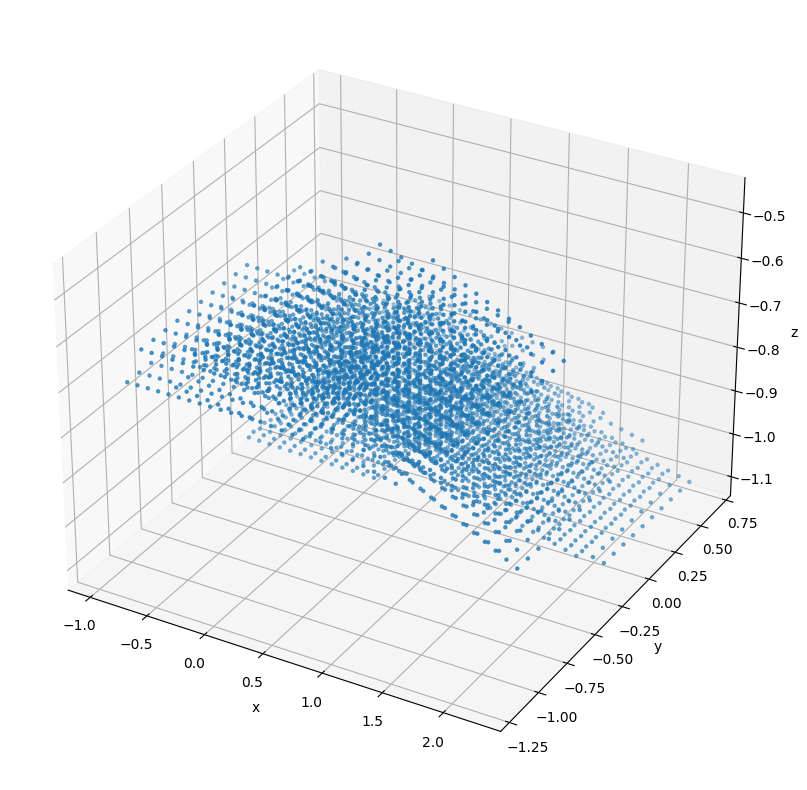

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(points_3d_cameras[..., 0], points_3d_cameras[..., 1], points_3d_cameras[..., 2], marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')